In [1]:
import networkx as nx

In [2]:
G = nx.Graph()

In [3]:
G.add_node(1)

In [4]:
G

In [5]:
G.add_nodes_from([2,3])

In [6]:
G.add_nodes_from(["u", "v"])

In [7]:
G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

In [8]:
G.add_edge(1, 2)

In [9]:
G.add_edge("u", "v")

In [10]:
G.add_edges_from([(1,2),(3,2),('u','v'),(1,3)])

In [11]:
G.edges()

EdgeView([(1, 2), (1, 3), (2, 3), ('u', 'v')])

In [12]:
G.number_of_nodes()

5

In [13]:
G = nx.karate_club_graph()

In [14]:
import matplotlib.pyplot as plt

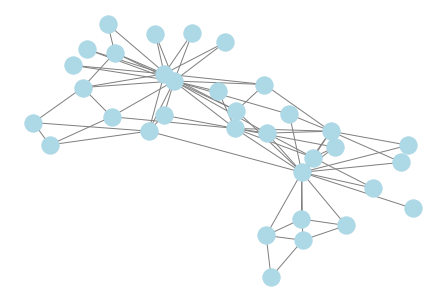

In [15]:
nx.draw(G, with_label = True, node_color="lightblue", edge_color = "grey")
plt.savefig("karate_graph.pdf")

In [16]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [17]:
G.degree(0)

16

In [18]:
G.degree()[0]

16

In [19]:
G.degree(0) is G.degree()[0]

True

In [42]:
from scipy.stats import bernoulli
N = 20
p = 0.5

def er_graph(N,p):
    """
    genrate ER graph.
    """
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for n1 in G.nodes():
        for n2 in G.nodes():
            if n1 < n2 and bernoulli.rvs(p=p):
                G.add_edge(n1, n2)
    return G

In [43]:
G.number_of_nodes()

20

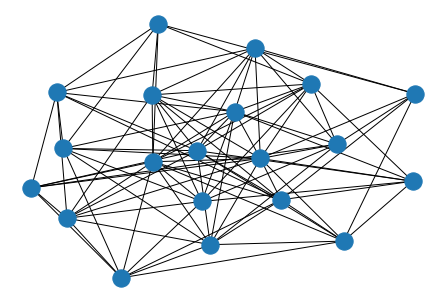

In [44]:
nx.draw(G)

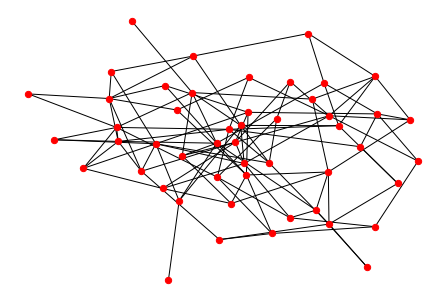

In [45]:
nx.draw(er_graph(50, 0.08), node_size = 40, node_color = 'red')

In [46]:
plt.savefig("ER_1.pdf")

<Figure size 432x288 with 0 Axes>

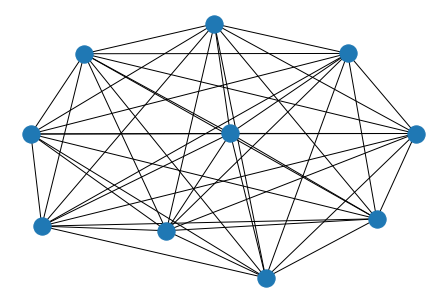

In [49]:
nx.draw(nx.erdos_renyi_graph(n=10,p=1))

In [50]:
def plot_degree_distribution(G):
    degree_sequence = [d for n,d in G.degree()]
    plt.hist(degree_sequence, histtype = "step")
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(K)$")
    plt.title("Degree Distribution")

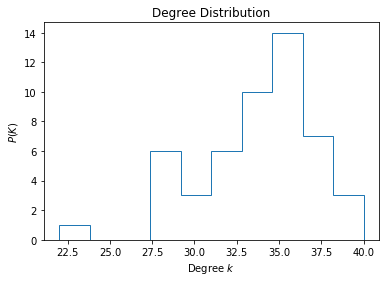

In [54]:
G1 = er_graph(50, 0.7)  # create ramdom graph
plot_degree_distribution(G1)
plt.savefig("hist1.pdf")

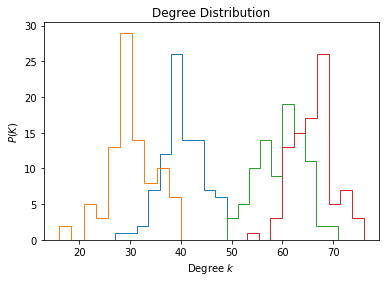

In [55]:
G1 = er_graph(90, 0.435)  # create ramdom graph
plot_degree_distribution(G1)
G2 = er_graph(90, 0.34)  # create ramdom graph
plot_degree_distribution(G2)
G3 = er_graph(90, 0.67)  # create ramdom graph
plot_degree_distribution(G3)
G4 = er_graph(90, 0.75)  # create ramdom graph
plot_degree_distribution(G4)
plt.savefig("hist_1234.pdf")

TypeError: '<' not supported between instances of 'dict' and 'float'

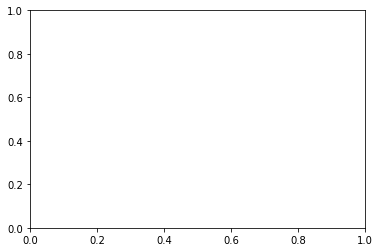

In [56]:
D = {1:1, 2:2, 3:3}
plt.hist(D)

In [57]:
nx.erdos_renyi_graph(100, 0.03) == nx.erdos_renyi_graph(100, 0.30)

False

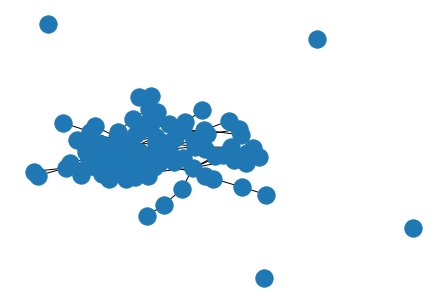

In [60]:
nx.draw(nx.erdos_renyi_graph(100, 0.03))

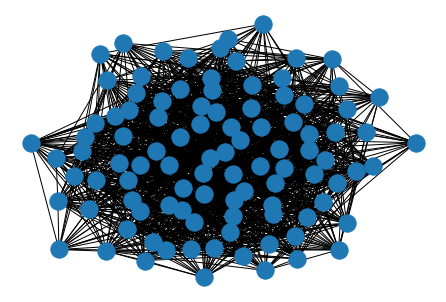

In [61]:
nx.draw(nx.erdos_renyi_graph(100, 0.30))

In [62]:
import numpy as np

In [66]:
A1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2 = np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter=",")

G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

In [70]:
def basic_net_stats(G):
    print("Number of nodes: %d" % G.number_of_nodes())
    print("NUmber of edges: %d" % G.number_of_edges())
    degree_sequence = [d for n,d in G.degree()]
    print("Average degree %.2f" % np.mean(degree_sequence))

In [71]:
basic_net_stats(G1)
basic_net_stats(G2)

Number of nodes: 843
NUmber of edges: 3405
Average degree 8.08
Number of nodes: 877
NUmber of edges: 3063
Average degree 6.99


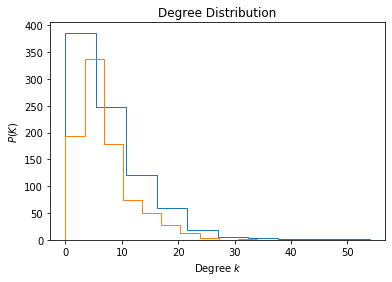

In [75]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.savefig("village_hist.pdf")